In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['sales']=labelencoder.fit_transform(data['sales'])
data['salary']=labelencoder.fit_transform(data['salary'])

In [3]:
x = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours','time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales']]
y = data['salary']


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [5]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(6,5),learning_rate_init=0.01)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [6]:
new_data = [[0.38,	0.53,	2,	157,	3,	0	,1,	0	,1]]
prediced_value=model.predict(new_data)
print(prediced_value)

[1]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [7]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict,labels=[1,0])
print(cm)

[[1267    0]
 [ 169    0]]


In [8]:
TP=cm[0][0]
TN=cm[1][1]
FP=cm[1][0]
FN=cm[0][1]

print(f"True Positive : {TP}")
print(f"True Negative : {TN}")
print(f"False Positive : {FP}")
print(f"False Negative : {FN}")

True Positive : 1267
True Negative : 0
False Positive : 169
False Negative : 0


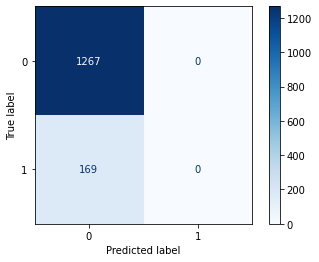

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(cm)
matrix.plot(cmap='Blues')

In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(y_test, y_predict,average='weighted' ):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(y_test, y_predict,average='weighted'):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(y_test, y_predict,average='weighted'):.3}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_predict):.3}")


Recall Score: 0.517
Specitivity Score: 0.0
Precision Score: 0.463
Negative Prediction Value: nan
F1 Score: 0.456
Matthews Correlation Coefficient: 0.0676


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adity\AppData\Local\Temp\ipykernel_23096\1408487141.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
